# 1.数据预处理（一）数据清洗、数据集成和数据变换

在数据挖掘中，存在着大量不完整的数据、不一致、异常的数据，严重影响到数据挖掘建模的执行效率，甚至有可能影响到数据挖掘的结果，所以数据清洗尤为重要。  

对数据进行清洗后，对数据的集成、转换、规约等操作，就是数据预处理。  

数据预处理的过程如下图所示

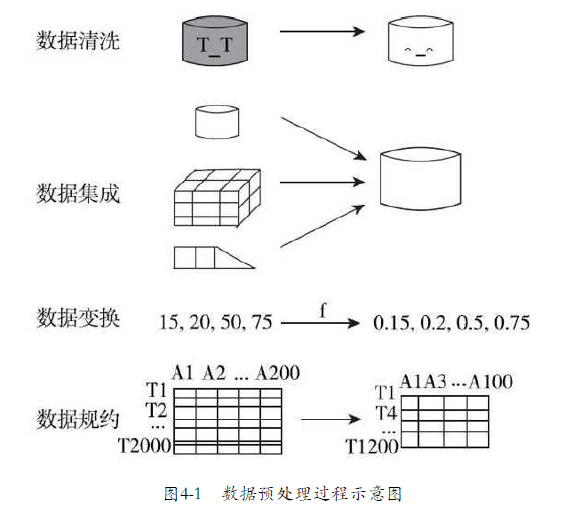

In [64]:
from IPython.display import Image
Image(filename  = '1.png', width = 500, height = 400)

# 1.1 数据清洗

数据清洗主要是删除原始数据中的无关数据、重复数据，平滑噪声数据，筛选与挖掘主题无关数据、处理缺失值、异常值等等。

# 1.1.1 缺失值处理

对缺失值的处理主要有三种方法：删除记录、数据插补和不处理。  

删除记录可以简单快捷地处理缺失值，但是这样会减少数据，当数据很小的情况下，这样可能会影响数据分析的结果。因此一般不采取这种方法。  

第二种方法，插值法。这里主要介绍拉格朗日插值法和牛顿插值法。

Python的Scipy库中提供了拉格朗日插值法的函数，而牛顿插值法则需要自行编写函数。  



In [7]:
import pandas as pd
from scipy.interpolate import lagrange # 导入拉格朗日插值函数
inputfile = 'data/catering_sale.xls'# 销量数据路径
outputfile = 'tmp/sales.xls'# 输出数据路径
data = pd.read_excel(inputfile)#读取数据
data.head()

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [8]:
data['销量'][(data['销量'] < 400) | (data['销量'] > 5000)] = None 
#过滤异常值，将其变为空值

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
data.head()

,日期,销量
0,2015-03-01,NaN
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [12]:
#自定义列向量插值函数
#s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s, n, k=5):
    y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取前后k个数
    y = y[y.notnull()] #剔除空值
    return lagrange(y.index, list(y))(n) #插值并返回插值结果

In [31]:
#逐个元素判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]: #如果为空即插值。
            data[i][j] = ployinterp_column(data[i], j)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
data[:10]

,日期,销量
0,2015-03-01,-291.400000
1,2015-02-28,2618.200000
2,2015-02-27,2608.400000
3,2015-02-26,2651.900000
4,2015-02-25,3442.100000
5,2015-02-24,3393.100000
6,2015-02-23,3136.600000
7,2015-02-22,3744.100000
8,2015-02-21,4275.254762
9,2015-02-20,4060.300000


# 1.1.2 异常值处理

处理异常值也有四种方法，分别是删除记录、视为缺失值、平均值修正和不处理  

删除异常值记录的方法简单易行，但跟处理缺失值一样，缺点也很明显。视为缺失值的好处是可以利用现有变量的信息对异常值（缺失值）进行填补。

# 1.2 数据集成

数据集成是将多个数据源的数据合并存放在一个一致的数据存储中的过程。

# 1.3 数据变换

数据变化你通常有两种，一种是简单函数变换，即计算平方、取对数等；另一种则是规范化。

数据规范化是因为有时候不同的量纲会给数据分析的结果带来很大的差异，为了尽量排除量纲的影响，需要进行规范化处理。  

规范化的方法有：
- 最大-最小规范化:$$x^*=\frac{x-min}{max-min}$$
- zero_score:$$x^*=\frac{x-\bar{x}}{\sigma}$$
- 小数定标规范化:$$x^*=\frac{x}{10^k}$$

In [40]:
import numpy as np
datafile = 'data/normalization_data.xls' #参数初始化
data = pd.read_excel(datafile, header = None) #读取数据
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [41]:
(data - data.min())/(data.max() - data.min()) #最小-最大规范化

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [42]:
(data - data.mean())/data.std() #零-均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [43]:
data/10**np.ceil(np.log10(data.abs().max())) #小数定标规范化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


# 1.3.3 连续属性离散化
  
前面我们学习《利用python进行数据分析》的时候学到过，离散化就是将连续属性变为分类属性，主要方法有
- 等宽法：将属性分为相同宽度的区间
- 等频法：相同数量的记录放入区间

这两种方法可以用cut和qcut实现。这里介绍第三种方法：
- 聚类

一维聚类包括两个步骤，首先将连续属性的值按照聚类算法（比如K-means）进行聚类，然后再将聚类得到的簇进行处理，合并到一个簇的连续属性做统一标记。  

以下面这个医学中中医证型的相关数据为例进行说明

In [45]:
datafile = 'data/discretization_data.xls' #参数初始化
data = pd.read_excel(datafile) #读取数据
data = data[u'肝气郁结证型系数'].copy()
data.head()

0    0.056
1    0.488
2    0.107
3    0.322
4    0.242
Name: 肝气郁结证型系数, dtype: float64

In [47]:
k = 4
d1 = pd.cut(data, k, labels = range(k)) 
#等宽离散化，各个类比依次命名为0,1,2,3
d1.head()

0    0
1    3
2    0
3    2
4    1
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [54]:
#等频率离散化
d2 = pd.qcut(data, k, labels = range(k))
d2.head()

0    0
1    3
2    0
3    3
4    2
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [50]:
pd.value_counts(d1)

1    508
2    275
0    112
3     35
Name: 肝气郁结证型系数, dtype: int64

In [55]:
pd.value_counts(d2)

1    234
3    233
0    233
2    230
Name: 肝气郁结证型系数, dtype: int64

第三种方法我们等学到聚类方法时再来介绍

# 1.3.4 属性构造

如前面所学，我们可以利用map函数来进行数据的转换，构造新的属性。也可以直接利用构造

In [58]:
inputfile= 'data/electricity_data.xls' #供入供出电量数据
data = pd.read_excel(inputfile) #读入数据
data.head()

,供入电量,供出电量
0,986,912
1,1208,1083
2,1108,975
3,1082,934
4,1285,1102


比如，我们想计算
$$线损率=\frac{供入电量-供出电量}{供入电量}\times\%%$$

In [59]:
data[u'线损率'] = (data[u'供入电量'] - data[u'供出电量'])/data[u'供入电量']
data.head()

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


# 1.3.5小波变换

小波变换是新型数据分析工具是近年来兴起的信号分析手段。小波分析的理论和方法在信号处理、图像处理、语音处理、模式识别、量子物理等领域得到越来越广泛的应用，它被认为是近年来在工具及方法上的重大突破。小波变换具有多分辨率的特点，在时域和频域都具有表征信号局部特征的能力，通过伸缩和平移等运算过程对信号进行多尺度聚焦分析，提供了一种非平稳信号的时频分析手段，可以由粗及细地逐步观察信号，从中提取有用信息。

能够刻画某个问题的特征量往往是隐含在一个信号中的某个或者某些分量中，小波变换可以把非平稳信号分解为表达不同层次、不同频带信息的数据序列，即小波系数。选取适当的小波系数，即完成了信号的特征提取。


由于小波变换较为复杂，改天我们再单独讨论小波变化的原理和实现。